**Team Members:**

    Nzokou Kylian (PGE 5)

    Olusegun Ajose (PGE 5)

    Ndane Ndazhaga (PGE 5)

    Laura Tetsa (PGE 5)

    Stella Detio (PGE 4)

In [1]:
import gdown
from keras.utils import img_to_array, load_img
from keras.models import load_model
from numpy import load

In [2]:
# load model


# ### path to dataset; donwload, extract and put path as dataset_path
# ### note that it is about 30k images; select a subset for fast testing
# ### https://drive.google.com/file/d/1yS_rHZsTBtN5YVtSDSr2VriBtLD_7P4A/view?usp=share_link

prepared_img_url = 'https://drive.google.com/uc?id=1yS_rHZsTBtN5YVtSDSr2VriBtLD_7P4A'
prepared_img = 'celeb_256.npz'

gdown.download(prepared_img_url, prepared_img, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1yS_rHZsTBtN5YVtSDSr2VriBtLD_7P4A
To: /content/celeb_256.npz
100%|██████████| 750M/750M [00:16<00:00, 45.1MB/s]


'celeb_256.npz'

### Load model from previous step

In [3]:

model_path_url = 'https://drive.google.com/uc?id=1-sT4Bla-hX2UIm8jxU6uoFzxo2cXlZr5' 
model_path = 'model_200100.h5'

gdown.download(model_path_url, model_path, quiet=False)

model = load_model(model_path)

Downloading...
From: https://drive.google.com/uc?id=1-sT4Bla-hX2UIm8jxU6uoFzxo2cXlZr5
To: /content/model_200100.h5
100%|██████████| 218M/218M [00:05<00:00, 41.0MB/s]
/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


## **Test the images generated by the model:**

In [4]:
# load and prepare training images
def load_real_samples(filename):
	# load compressed arrays
	data = load(filename)
 
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']

	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
  
	return [X1, X2]

In [5]:
# load dataset
[real_imgs, cart_imgs] = load_real_samples(prepared_img) 

print('Loaded', real_imgs.shape, cart_imgs.shape)


Loaded (2001, 256, 256, 3) (2001, 256, 256, 3)


We are concient that a higher number of training epochs does not necessarily imply a better quality of the generated model, meaning we can choose a model based on the quality of the generated images and use it to perform the image-to-image translation. We despite that decided to choose the last saved model i.e after 200,100 training iterations.

We will test the generation in random images of our data set.

In [6]:
from numpy.random import randint
from numpy import asarray, vstack, savez_compressed

# select random example
ix = randint(0, len(real_imgs), 1)
src_image, tar_image = real_imgs[ix], cart_imgs[ix]

In [7]:
# generate image from source
gen_image = model.predict(src_image)

1/1 [==============================] - 9s 9s/step


In [8]:
from matplotlib import pyplot

# function to plot source, generated and target images
def plot_images(src_img, gen_img, tar_img):
	images = vstack((src_img, gen_img, tar_img))

	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	titles = ['Source', 'Generated', 'Expected']

	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, 3, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# show title
		pyplot.title(titles[i])

	pyplot.show()

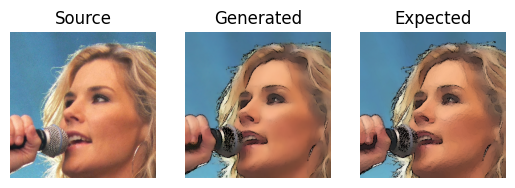

In [9]:
plot_images(src_image, gen_image, tar_image)

As we can see fromthe above plots, the generated image is not that much different from the expected cartoonized image. Meaning that the generator is able to generate cortoonized enough images.

# Test generator on an unseen image

In [10]:
from numpy import load, expand_dims

We create a function to load and preprocess new images to be passed to the model

In [11]:
# load an image
def load_image(filename, size=(256,256)):
	# load image with the preferred size
	pixels = load_img(filename, target_size=size)
	# convert to numpy array
	pixels = img_to_array(pixels)
	# scale from [0,255] to [-1,1]
	pixels = (pixels - 127.5) / 127.5
	# reshape to 1 sample
	pixels = expand_dims(pixels, 0)
	return pixels


In [12]:
# load test image

test_img_url_list = ['https://drive.google.com/uc?id=1P9j7ZB62vNt1wvAb7MUqbvp0n9cNKbuP',
                'https://drive.google.com/uc?id=1tLOAlb0uy44WYiRdCw0yXUI_UE2tOvPc',
                ]
 
test_image_list = []       

i = 0
for test_img_url in test_img_url_list:          

  test_img_path = f'photo_cv_{i}.jpeg'

  gdown.download(test_img_url, test_img_path, quiet=False)

  test_image = load_image(test_img_path)
  test_image_list.append(test_image)

  print('Loaded', test_image.shape)
  i+=1

Downloading...
From: https://drive.google.com/uc?id=1P9j7ZB62vNt1wvAb7MUqbvp0n9cNKbuP
To: /content/photo_cv_0.jpeg
100%|██████████| 141k/141k [00:00<00:00, 44.6MB/s]


Loaded (1, 256, 256, 3)


Downloading...
From: https://drive.google.com/uc?id=1tLOAlb0uy44WYiRdCw0yXUI_UE2tOvPc
To: /content/photo_cv_1.jpeg
100%|██████████| 72.2k/72.2k [00:00<00:00, 21.4MB/s]

Loaded (1, 256, 256, 3)


1/1 [==============================] - 0s 26ms/step


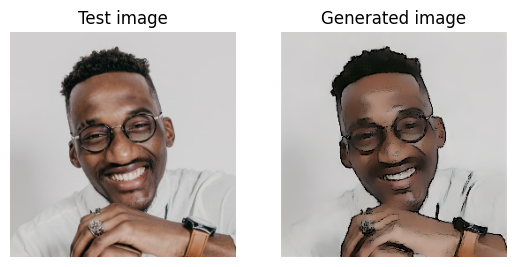

1/1 [==============================] - 0s 21ms/step


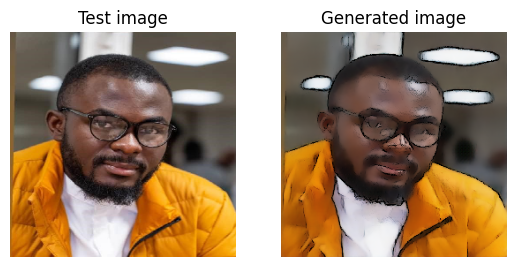

In [14]:
for test_image in test_image_list:

  # generate cartoon from test image
  gen_image = model.predict(test_image)

  images = vstack((test_image, gen_image))

  # scale from [-1,1] to [0,1]
  images = (images + 1) / 2.0
  titles = ['Test image', 'Generated image']

  # plot images row by row
  for i in range(len(images)):
    # define subplot
    pyplot.subplot(1, 2, 1 + i)

    # turn off axis
    pyplot.axis('off')

    # plot raw pixel data
    pyplot.imshow(images[i])

    # show title
    pyplot.title(titles[i])

  pyplot.show()